In [1]:
%%time
import malaya

CPU times: user 12.3 s, sys: 1.53 s, total: 13.8 s
Wall time: 17.8 s


## Explanation

Positive relevancy: The article or piece of text is relevant, tendency is high to become not a fake news. Can be a positive or negative sentiment.

Negative relevancy: The article or piece of text is not relevant, tendency is high to become a fake news. Can be a positive or negative sentiment.

Right now relevancy module only support deep learning model.

In [2]:
negative_text = 'Roti Massimo Mengandungi DNA Babi. Roti produk Massimo keluaran Syarikat The Italian Baker mengandungi DNA babi. Para pengguna dinasihatkan supaya tidak memakan produk massimo. Terdapat pelbagai produk roti keluaran syarikat lain yang boleh dimakan dan halal. Mari kita sebarkan berita ini supaya semua rakyat Malaysia sedar dengan apa yang mereka makna setiap hari. Roti tidak halal ada DNA babi jangan makan ok.'
positive_text = 'Jabatan Kemajuan Islam Malaysia memperjelaskan dakwaan sebuah mesej yang dikitar semula, yang mendakwa kononnya kod E dikaitkan dengan kandungan lemak babi sepertimana yang tular di media sosial. . Tular: November 2017 . Tular: Mei 2014 JAKIM ingin memaklumkan kepada masyarakat berhubung maklumat yang telah disebarkan secara meluas khasnya melalui media sosial berhubung kod E yang dikaitkan mempunyai lemak babi. Untuk makluman, KOD E ialah kod untuk bahan tambah (aditif) dan ianya selalu digunakan pada label makanan di negara Kesatuan Eropah. Menurut JAKIM, tidak semua nombor E yang digunakan untuk membuat sesuatu produk makanan berasaskan dari sumber yang haram. Sehubungan itu, sekiranya sesuatu produk merupakan produk tempatan dan mendapat sijil Pengesahan Halal Malaysia, maka ia boleh digunakan tanpa was-was sekalipun mempunyai kod E-kod. Tetapi sekiranya produk tersebut bukan produk tempatan serta tidak mendapat sijil pengesahan halal Malaysia walaupun menggunakan e-kod yang sama, pengguna dinasihatkan agar berhati-hati dalam memilih produk tersebut.'

## List available deep learning models

In [3]:
malaya.relevancy.available_deep_model()

['self-attention', 'dilated-cnn']

As you can see, we are not using recurrent architecture for relevancy classification. Article or news can be really a long text, and when talking about recurrent on long text dependency, we might have a problem about gradient vanishing or long term dependency, plus it is very expensive to calculate.

## Load deep learning models

Good thing about deep learning models from Malaya, it returns `Attention` result, means, which part of words give the high impact to the results. But to get `Attention`, you need to set `get_proba=True`.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Load dilated-cnn model

In [5]:
model = malaya.relevancy.deep_model('dilated-cnn')

downloading frozen /Users/huseinzol/Malaya/relevancy/self-attention model


94.0MB [00:33, 3.73MB/s]                          
  0%|          | 0.00/7.17 [00:00<?, ?MB/s]

downloading frozen /Users/huseinzol/Malaya/relevancy/self-attention setting


8.00MB [00:02, 3.75MB/s]                          


#### Predict single string

In [7]:
model.predict(positive_text)

'positive'

In [8]:
result = model.predict(positive_text,get_proba=True,add_neutral=False)
result

{'positive': 0.9991547,
 'negative': 0.00084533397,
 'attention': {'Jabatan': 0.024738397,
  'Kemajuan': 0.008837365,
  'Islam': 0.0024237907,
  'Malaysia': 9.018409e-08,
  'memperjelaskan': 0.0034145564,
  'dakwaan': 0.00816603,
  'sebuah': 0.2912236,
  'mesej': 0.008252924,
  'yang': 4.0573254e-06,
  'dikitar': 0.004085772,
  'semula': 0.24153505,
  ',': 0.0,
  'mendakwa': 0.08853194,
  'kononnya': 0.0004483624,
  'kod': 9.2239924e-07,
  'E': 0.0,
  'dikaitkan': 0.0001344327,
  'dengan': 0.0011281366,
  'kandungan': 0.0031591463,
  'lemak': 7.5735064e-05,
  'babi': 1.3862892e-05,
  'sepertimana': 0.0031050642,
  'tular': 0.00030034894,
  'di': 0.0,
  'media': 8.364478e-05,
  'sosial': 6.375957e-05,
  '.': 0.0,
  'Tular': 0.00020641745,
  ':': 0.0,
  'November 2017': 0.0019049036,
  'Mei 2014': 0.00048462205,
  'JAKIM': 0.000263208,
  'ingin': 0.003996827,
  'memaklumkan': 0.0024986444,
  'kepada': 0.053978425,
  'masyarakat': 0.0027177127,
  'berhubung': 3.6674945e-05,
  'maklumat': 

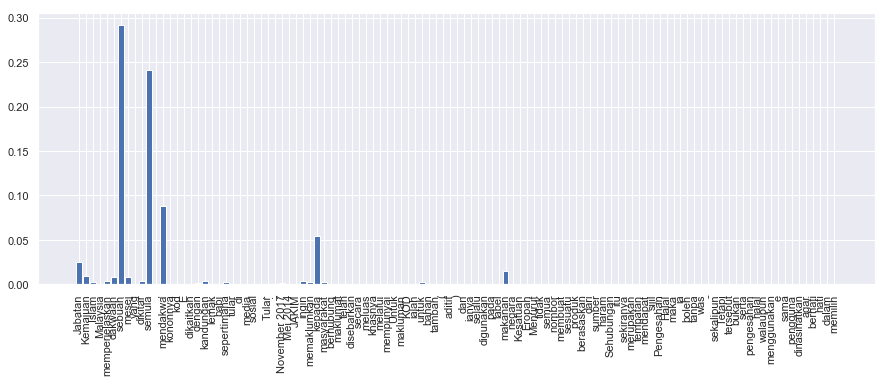

In [9]:
plt.figure(figsize = (15, 5))
keys = result['attention'].keys()
values = result['attention'].values()
aranged = [i for i in range(len(keys))]
plt.bar(aranged, values)
plt.xticks(aranged, keys, rotation = 'vertical')
plt.show()

#### Open relevancy visualization dashboard

Default when you call `predict_words` it will open a browser with visualization dashboard, you can disable by `visualization=False`.

In [10]:
model.predict_words(positive_text)

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [01/Jun/2019 12:40:51] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [01/Jun/2019 12:40:52] "GET /static/admin-materialize.min.css HTTP/1.1" 200 -
127.0.0.1 - - [01/Jun/2019 12:40:52] "GET /static/echarts.min.js HTTP/1.1" 200 -
127.0.0.1 - - [01/Jun/2019 12:40:52] "GET /favicon.ico HTTP/1.1" 200 -
----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 62487)
Traceback (most recent call last):
  File "/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/socketserver.py", line 361, in finish_request
    self.Re


stopping Server...


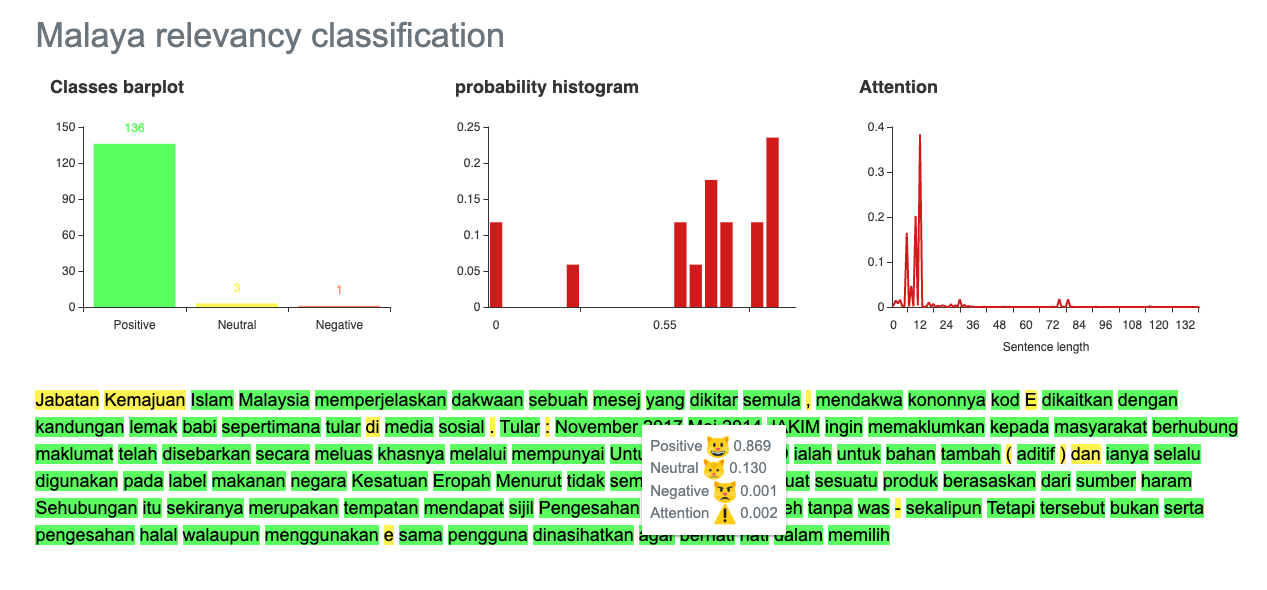

In [11]:
from IPython.core.display import Image, display

display(Image('relevancy-dilated-cnn.png', width=800))

I tried to put the html and javascript inside a notebook cell, pretty hard you know and a lot of weird bugs. Let stick to HTTP serving ya.

`predict_words` only accept a single string. You can't predict multiple texts.

#### Predict batch of strings

In [13]:
model.predict_batch([negative_text, positive_text],get_proba=True, add_neutral=False)

[{'positive': 0.43126237, 'negative': 0.5687377},
 {'positive': 0.9965766, 'negative': 0.003423397}]

**You might want to try `self-attention` by yourself.**

## Stacking models

More information, you can read at [https://malaya.readthedocs.io/en/latest/Stack.html](https://malaya.readthedocs.io/en/latest/Stack.html)

In [14]:
cnn = malaya.relevancy.deep_model('dilated-cnn')
attention = malaya.relevancy.deep_model('self-attention')

downloading frozen /Users/huseinzol/Malaya/relevancy/self-attention model


180MB [00:56, 4.70MB/s]                          


In [15]:
malaya.stack.predict_stack([cnn, attention], positive_text)

{'positive': 0.6821273, 'negative': 0.002180755, 'neutral': 0.21589473}